In [27]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

#open csv files
emission_file = Path('resources/emissions-by-sector.csv')
emission_df = pd.read_csv(emission_file, encoding="ISO-8859-1")

In [28]:
emission_df

,Entity,Code,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
0,Afghanistan,AFG,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,980000.0,320000.0,280000.0,0.0,20000.00
1,Afghanistan,AFG,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.00
2,Afghanistan,AFG,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.00
3,Afghanistan,AFG,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.00
4,Afghanistan,AFG,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,ZWE,2016,10490000.0,87400000.0,2480000.0,2650000.00,1600000.0,1080000.0,2220000.0,5930000.0,680000.0,800000.0,129999.99
6351,Zimbabwe,ZWE,2017,10760000.0,87290000.0,2540000.0,2690000.00,1680000.0,1100000.0,2280000.0,5160000.0,700000.0,800000.0,160000.00
6352,Zimbabwe,ZWE,2018,10940000.0,87380000.0,2590000.0,2740000.00,1830000.0,1160000.0,2930000.0,5530000.0,710000.0,940000.0,190000.00
6353,Zimbabwe,ZWE,2019,10990000.0,87330000.0,2640000.0,2770000.00,1810000.0,1100000.0,2600000.0,5130000.0,730000.0,930000.0,160000.00


In [29]:
# Remove column 'Code' from the DataFrame
cleaned_emission = emission_df.drop('Code', axis=1)
cleaned_emission

,Entity,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
0,Afghanistan,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,980000.0,320000.0,280000.0,0.0,20000.00
1,Afghanistan,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.00
2,Afghanistan,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.00
3,Afghanistan,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.00
4,Afghanistan,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,2016,10490000.0,87400000.0,2480000.0,2650000.00,1600000.0,1080000.0,2220000.0,5930000.0,680000.0,800000.0,129999.99
6351,Zimbabwe,2017,10760000.0,87290000.0,2540000.0,2690000.00,1680000.0,1100000.0,2280000.0,5160000.0,700000.0,800000.0,160000.00
6352,Zimbabwe,2018,10940000.0,87380000.0,2590000.0,2740000.00,1830000.0,1160000.0,2930000.0,5530000.0,710000.0,940000.0,190000.00
6353,Zimbabwe,2019,10990000.0,87330000.0,2640000.0,2770000.00,1810000.0,1100000.0,2600000.0,5130000.0,730000.0,930000.0,160000.00


In [30]:
#Rename columns
renamed_df = cleaned_emission.rename(columns={"Entity":"Country"})
renamed_df

,Country,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
0,Afghanistan,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,980000.0,320000.0,280000.0,0.0,20000.00
1,Afghanistan,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.00
2,Afghanistan,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.00
3,Afghanistan,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.00
4,Afghanistan,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,2016,10490000.0,87400000.0,2480000.0,2650000.00,1600000.0,1080000.0,2220000.0,5930000.0,680000.0,800000.0,129999.99
6351,Zimbabwe,2017,10760000.0,87290000.0,2540000.0,2690000.00,1680000.0,1100000.0,2280000.0,5160000.0,700000.0,800000.0,160000.00
6352,Zimbabwe,2018,10940000.0,87380000.0,2590000.0,2740000.00,1830000.0,1160000.0,2930000.0,5530000.0,710000.0,940000.0,190000.00
6353,Zimbabwe,2019,10990000.0,87330000.0,2640000.0,2770000.00,1810000.0,1100000.0,2600000.0,5130000.0,730000.0,930000.0,160000.00


In [31]:
# duplicate dataframe before removing rows - just in case
duplicate_df = renamed_df.copy()

In [32]:
# Define the list of words to search for
words_to_search = ['Africa', 'Asia', 'European Union (27)', 'Europe', 'High-income countries',
                   'Low-income countries', 'Lower-middle-income countries', 'North America',
                   'Oceania', 'South America', 'Upper-middle-income countries', 'World']

# Initialize an empty list to store the rows to drop
rows_to_drop = []

# Iterate over the DataFrame rows
for index, row in renamed_df.iterrows():
    for word in words_to_search:
        if word in row['Country']:
            rows_to_drop.append(index)
            break  # Break out of the inner loop once a word is found

# Drop the rows
renamed_df.drop(rows_to_drop, inplace=True)
renamed_df

,Country,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
0,Afghanistan,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,980000.0,320000.0,280000.0,0.0,20000.00
1,Afghanistan,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.00
2,Afghanistan,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.00
3,Afghanistan,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.00
4,Afghanistan,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,2016,10490000.0,87400000.0,2480000.0,2650000.00,1600000.0,1080000.0,2220000.0,5930000.0,680000.0,800000.0,129999.99
6351,Zimbabwe,2017,10760000.0,87290000.0,2540000.0,2690000.00,1680000.0,1100000.0,2280000.0,5160000.0,700000.0,800000.0,160000.00
6352,Zimbabwe,2018,10940000.0,87380000.0,2590000.0,2740000.00,1830000.0,1160000.0,2930000.0,5530000.0,710000.0,940000.0,190000.00
6353,Zimbabwe,2019,10990000.0,87330000.0,2640000.0,2770000.00,1810000.0,1100000.0,2600000.0,5130000.0,730000.0,930000.0,160000.00


In [33]:
# Filter the rows based on the condition (years between 1990-1994) in the "Year" column:
remove_years = renamed_df[~renamed_df['Year'].between(1990, 1994)]

remove_years

,Country,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
5,Afghanistan,1995,8950000.0,-2390000.0,1670000.0,160000.0,70000.0,340000.0,730000.0,180000.0,80000.0,0.0,20000.00
6,Afghanistan,1996,9980000.0,-2390000.0,1730000.0,170000.0,80000.0,320000.0,700000.0,170000.0,90000.0,0.0,20000.00
7,Afghanistan,1997,10950000.0,-2390000.0,1790000.0,170000.0,100000.0,300000.0,670000.0,160000.0,90000.0,0.0,20000.00
8,Afghanistan,1998,11750000.0,-2390000.0,1840000.0,170000.0,110000.0,280000.0,670000.0,160000.0,90000.0,0.0,20000.00
9,Afghanistan,1999,12790000.0,-2390000.0,1900000.0,170000.0,120000.0,250000.0,490000.0,160000.0,90000.0,0.0,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,2016,10490000.0,87400000.0,2480000.0,2650000.0,1600000.0,1080000.0,2220000.0,5930000.0,680000.0,800000.0,129999.99
6351,Zimbabwe,2017,10760000.0,87290000.0,2540000.0,2690000.0,1680000.0,1100000.0,2280000.0,5160000.0,700000.0,800000.0,160000.00
6352,Zimbabwe,2018,10940000.0,87380000.0,2590000.0,2740000.0,1830000.0,1160000.0,2930000.0,5530000.0,710000.0,940000.0,190000.00
6353,Zimbabwe,2019,10990000.0,87330000.0,2640000.0,2770000.0,1810000.0,1100000.0,2600000.0,5130000.0,730000.0,930000.0,160000.00


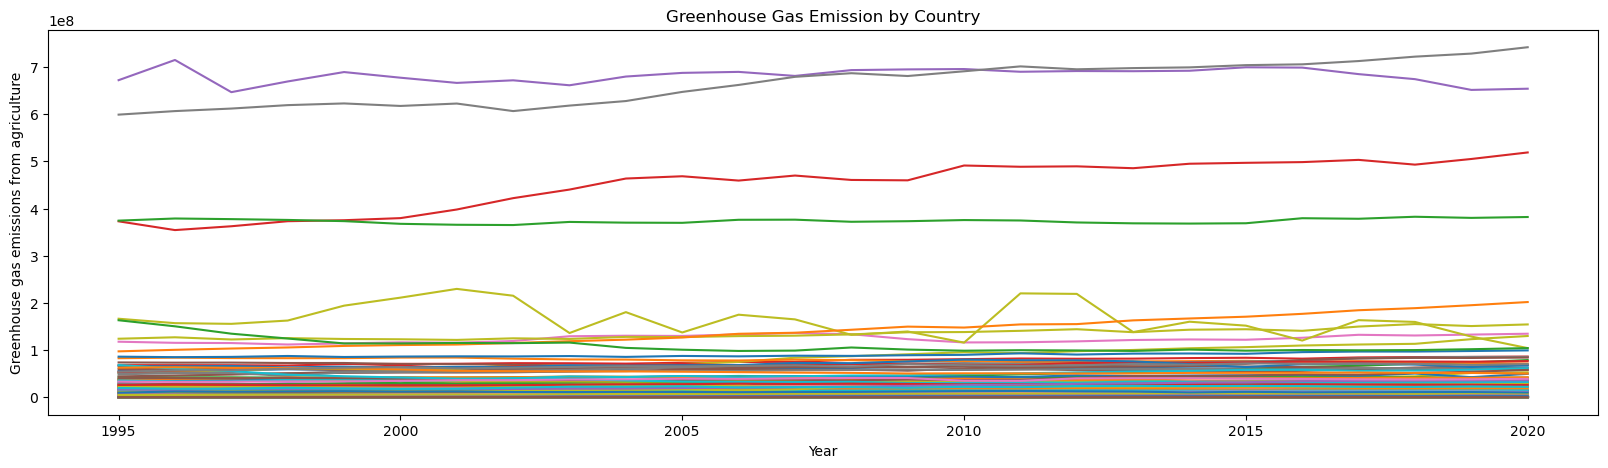

In [34]:
# Plot greenhouse gas emissions from agriculture for different years and countries
plt.figure(figsize=(20, 5))
for country in remove_years['Country'].unique():
    country_data = remove_years[remove_years['Country'] == country]
    plt.plot(country_data['Year'], country_data['Greenhouse gas emissions from agriculture'], label=country)

plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions from agriculture')
plt.title('Greenhouse Gas Emission by Country')
# plt.legend(args)
plt.show()

#this is too messy - dont use

In [35]:
# Define the list of words to search for
words_to_search = ["China", "United States", "India", "Russia", 
                   "Japan", "Germany", "Canada", "United Kingdom", 
                   "Italy", "France",]

# Initialize an empty list to store the rows to keep
rows_to_keep = []

# Iterate over the DataFrame rows
for index, row in remove_years.iterrows():
    for word in words_to_search:
        if word == row['Country']:
            rows_to_keep.append(index)
            break  # Break out of the inner loop once a word is found

# Keep only the rows that contain the words in the list
filtered_df = remove_years.loc[rows_to_keep]

In [36]:
# finalize cleaning with new df name
final_df = filtered_df
final_df

,Country,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
997,Canada,1995,55580000.0,84150000.0,18390000.0,69340000.0,27130000.0,78340000.0,1.411100e+08,1.479300e+08,35760000.0,8980000.0,5860000.0
998,Canada,1996,58010000.0,88160000.0,18320000.0,74840000.0,27600000.0,81840000.0,1.444900e+08,1.492200e+08,36700000.0,9540000.0,6110000.0
999,Canada,1997,57220000.0,85480000.0,18620000.0,72070000.0,26770000.0,81770000.0,1.490200e+08,1.619100e+08,37640000.0,9940000.0,5990000.0
1000,Canada,1998,59140000.0,93590000.0,18880000.0,65000000.0,23570000.0,79080000.0,1.517000e+08,1.763100e+08,39960000.0,9570000.0,6720000.0
1001,Canada,1999,57970000.0,87690000.0,19170000.0,68140000.0,20310000.0,79860000.0,1.555200e+08,1.779600e+08,39640000.0,9850000.0,6500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,United States,2016,379460000.0,-220240000.0,131030000.0,501940000.0,222020000.0,442309980.0,1.768760e+09,2.154190e+09,356680000.0,46850000.0,138120000.0
6041,United States,2017,378280000.0,-219050000.0,132130010.0,503029980.0,227960000.0,432700000.0,1.781510e+09,2.072960e+09,373240000.0,46030000.0,149620000.0
6042,United States,2018,382549980.0,-219130000.0,133240010.0,556970000.0,231670000.0,457690020.0,1.820880e+09,2.105010e+09,419720000.0,46910000.0,140920000.0
6043,United States,2019,380180000.0,-220260000.0,134350000.0,557570000.0,238670000.0,442600000.0,1.815660e+09,1.965560e+09,465250000.0,39900000.0,150170000.0


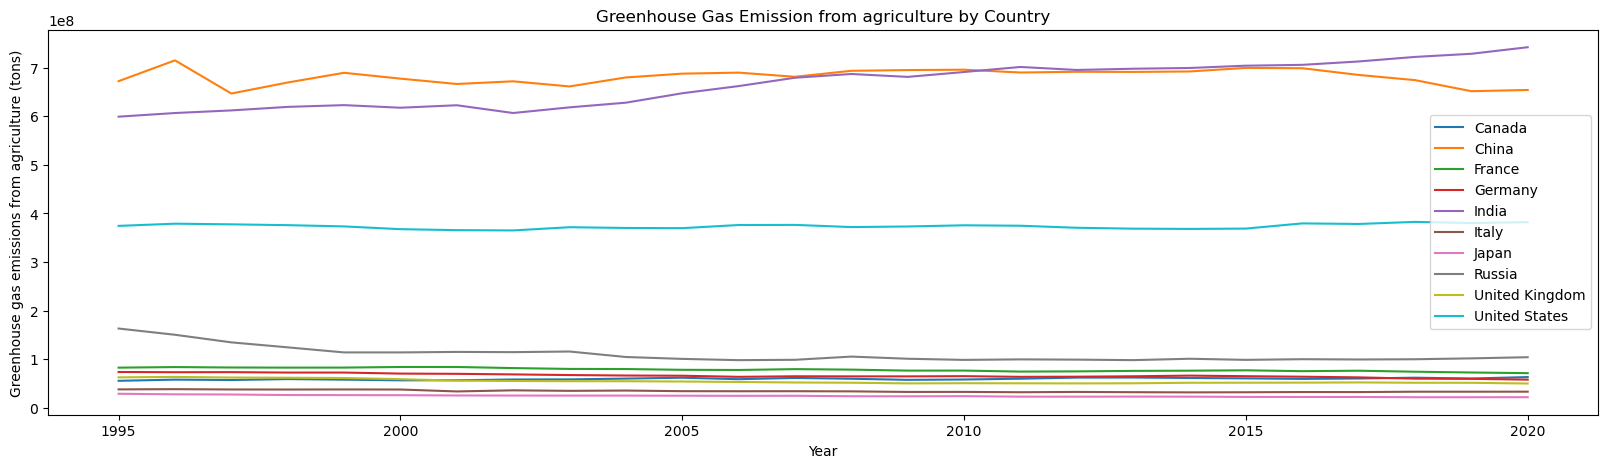

In [37]:
# Plot greenhouse gas emissions for different years and countries
plt.figure(figsize=(20, 5))
for country in final_df['Country'].unique():
    country_info = final_df[final_df['Country'] == country]
    plt.plot(country_info['Year'], country_info['Greenhouse gas emissions from agriculture'], label=country)

plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions from agriculture (tons)')
plt.title('Greenhouse Gas Emission from agriculture by Country')
plt.legend()

plt.savefig('charts/co2_agriculture.jpg', format='jpg', dpi=300)

plt.show()

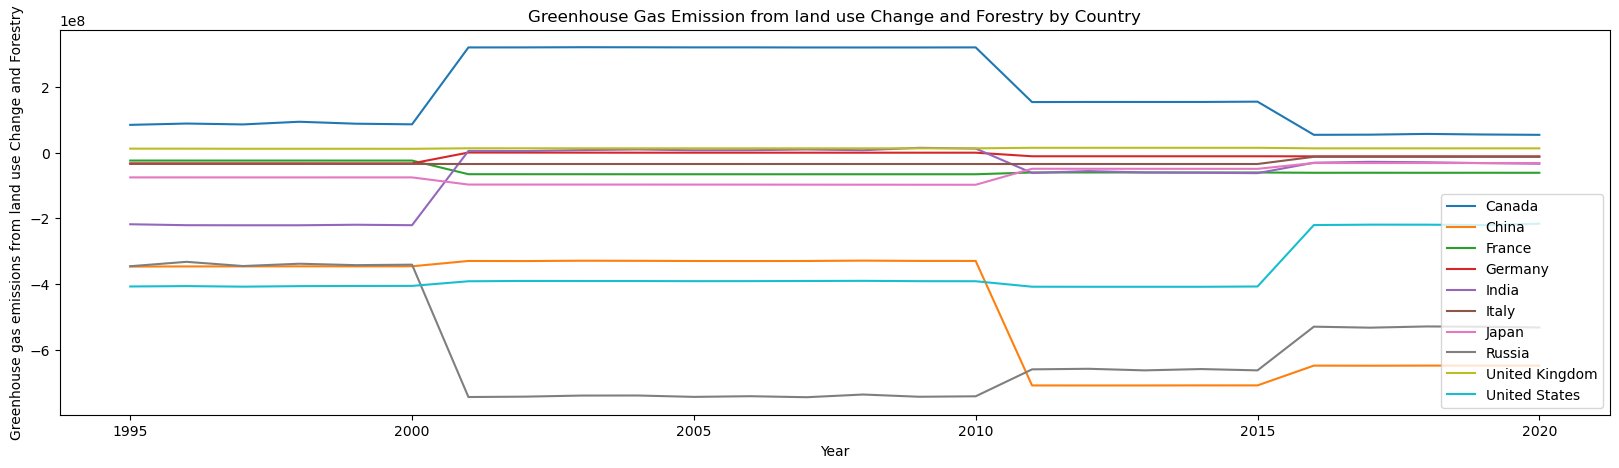

In [38]:
# Plot greenhouse gas emissions for different years and countries
plt.figure(figsize=(20, 5))
for country in final_df['Country'].unique():
    country_info = final_df[final_df['Country'] == country]
    plt.plot(country_info['Year'], country_info['Greenhouse gas emissions from land use change and forestry'], label=country)

plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions from land use Change and Forestry')
plt.title('Greenhouse Gas Emission from land use Change and Forestry by Country')
plt.legend()

plt.savefig('charts/co2_forestry.jpg', format='jpg', dpi=300)

plt.show()

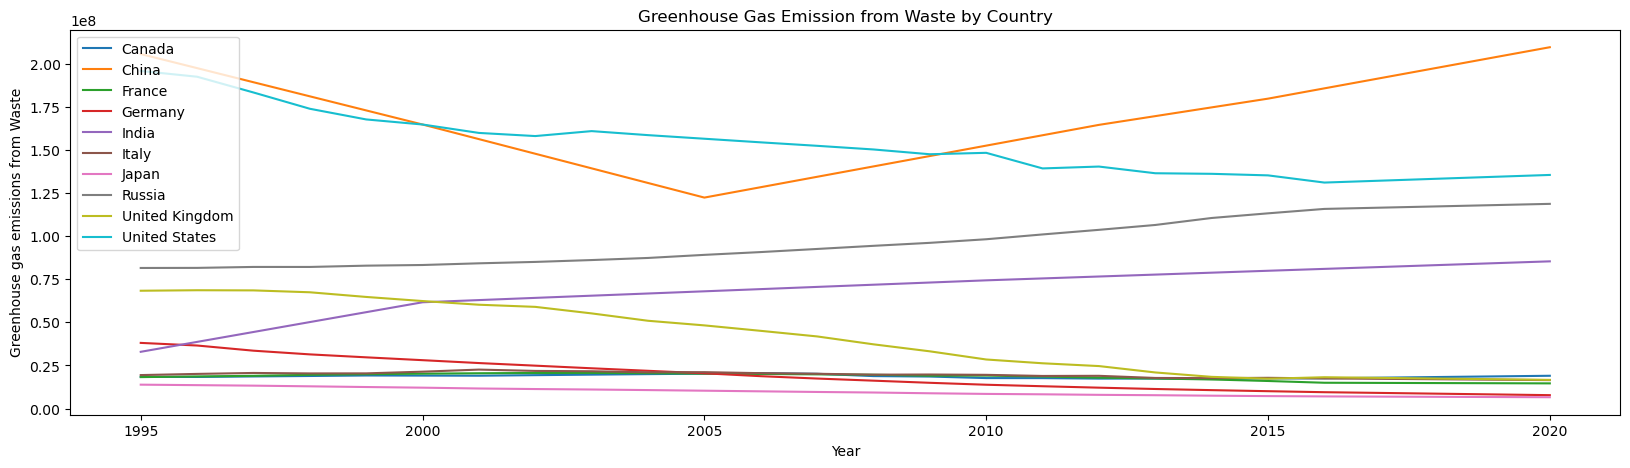

In [39]:
# Plot greenhouse gas emissions for different years and countries
plt.figure(figsize=(20, 5))
for country in final_df['Country'].unique():
    country_info = final_df[final_df['Country'] == country]
    plt.plot(country_info['Year'], country_info['Greenhouse gas emissions from waste'], label=country)

plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions from Waste')
plt.title('Greenhouse Gas Emission from Waste by Country')
plt.legend()

plt.savefig('charts/co2_waste.jpg', format='jpg', dpi=300)

plt.show()

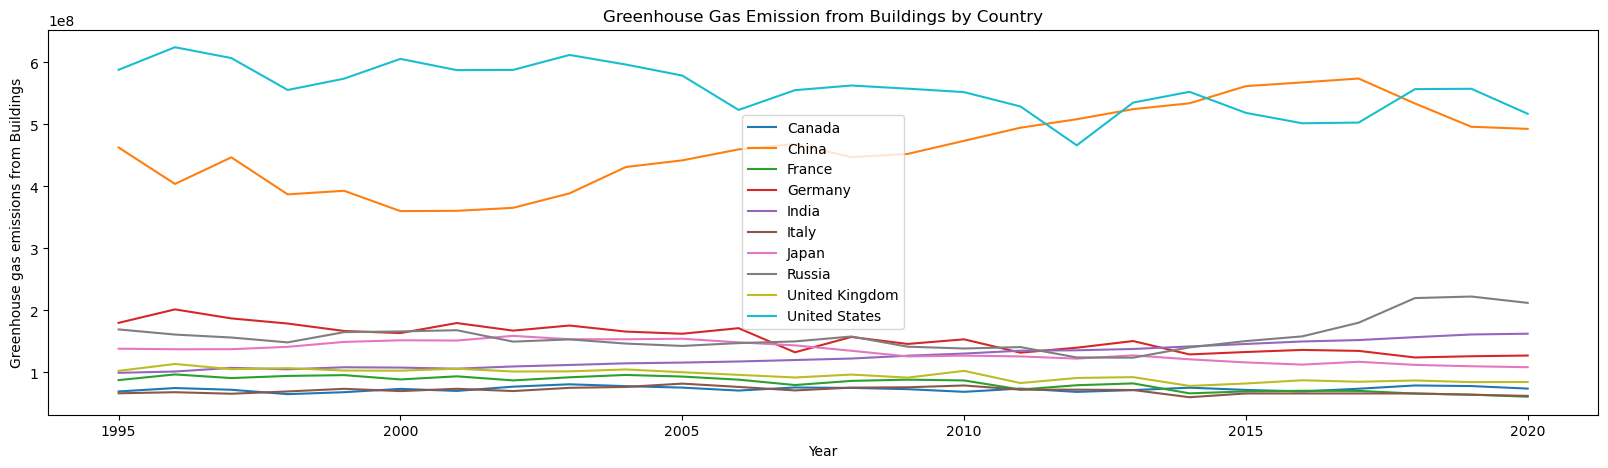

In [40]:
# Plot greenhouse gas emissions for different years and countries
plt.figure(figsize=(20, 5))
for country in final_df['Country'].unique():
    country_info = final_df[final_df['Country'] == country]
    plt.plot(country_info['Year'], country_info['Greenhouse gas emissions from buildings'], label=country)

plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions from Buildings')
plt.title('Greenhouse Gas Emission from Buildings by Country')
plt.legend()

plt.savefig('charts/co2_building.jpg', format='jpg', dpi=300)

plt.show()

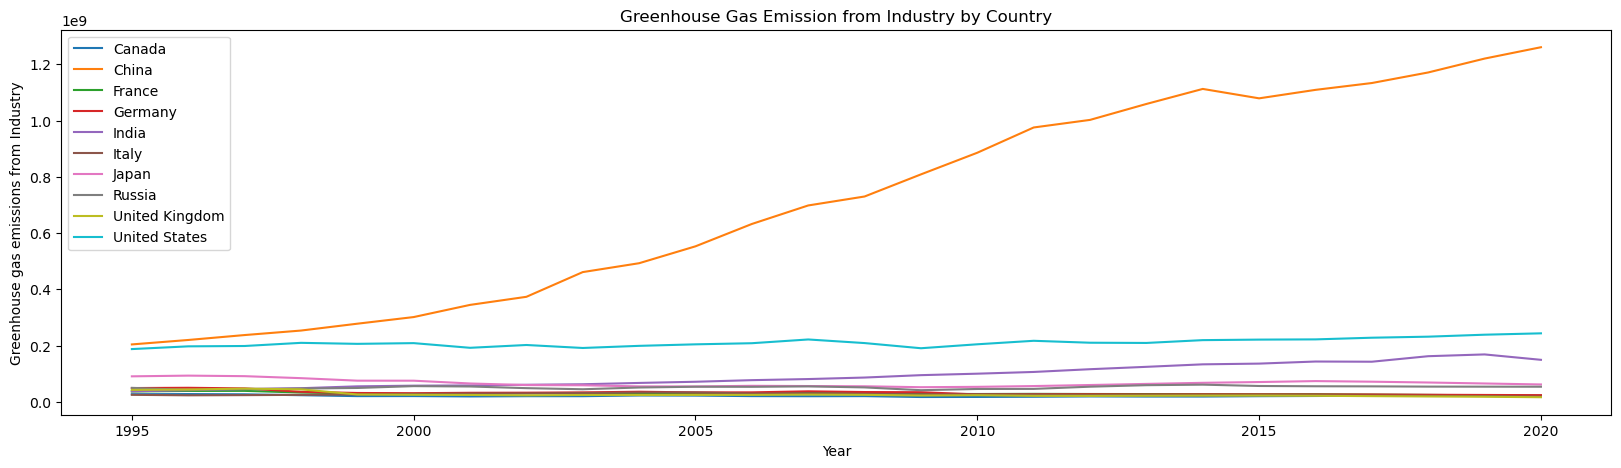

In [41]:
# Plot greenhouse gas emissions for different years and countries
plt.figure(figsize=(20, 5))
for country in final_df['Country'].unique():
    country_info = final_df[final_df['Country'] == country]
    plt.plot(country_info['Year'], country_info['Greenhouse gas emissions from industry'], label=country)

plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions from Industry')
plt.title('Greenhouse Gas Emission from Industry by Country')
plt.legend()

plt.savefig('charts/co2_industry.jpg', format='jpg', dpi=300)


plt.show()

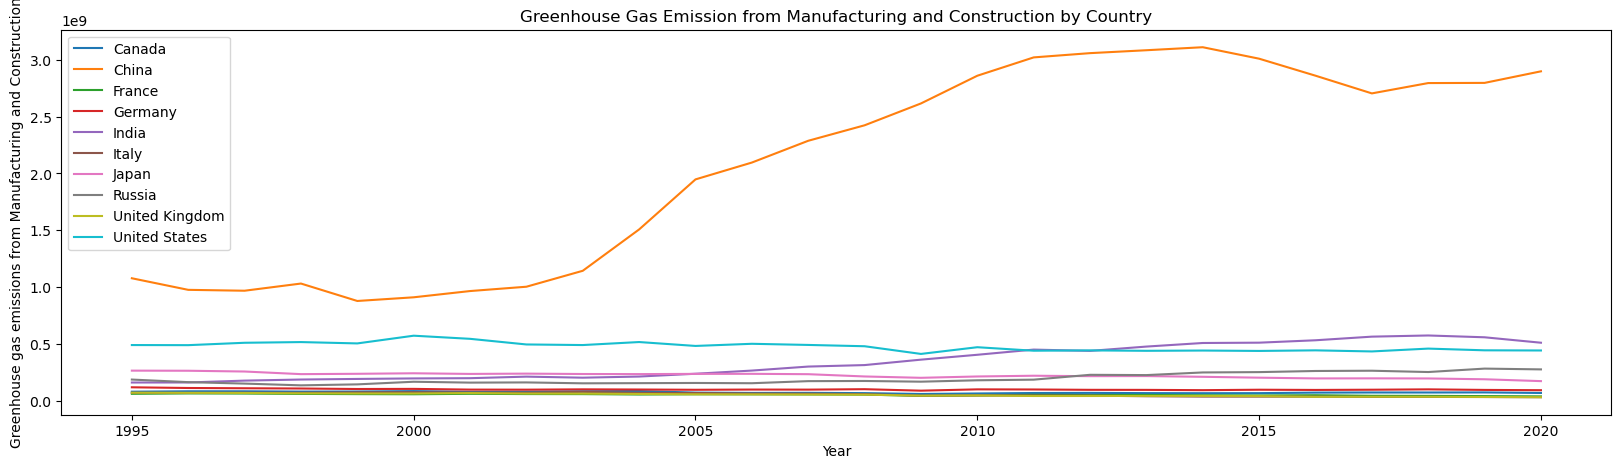

In [42]:
# Plot greenhouse gas emissions for different years and countries
plt.figure(figsize=(20, 5))
for country in final_df['Country'].unique():
    country_info = final_df[final_df['Country'] == country]
    plt.plot(country_info['Year'], country_info['Greenhouse gas emissions from manufacturing and construction'], label=country)

plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions from Manufacturing and Construction')
plt.title('Greenhouse Gas Emission from Manufacturing and Construction by Country')
plt.legend()

plt.savefig('charts/co2_manufacturingconstruction.jpg', format='jpg', dpi=300)


plt.show()

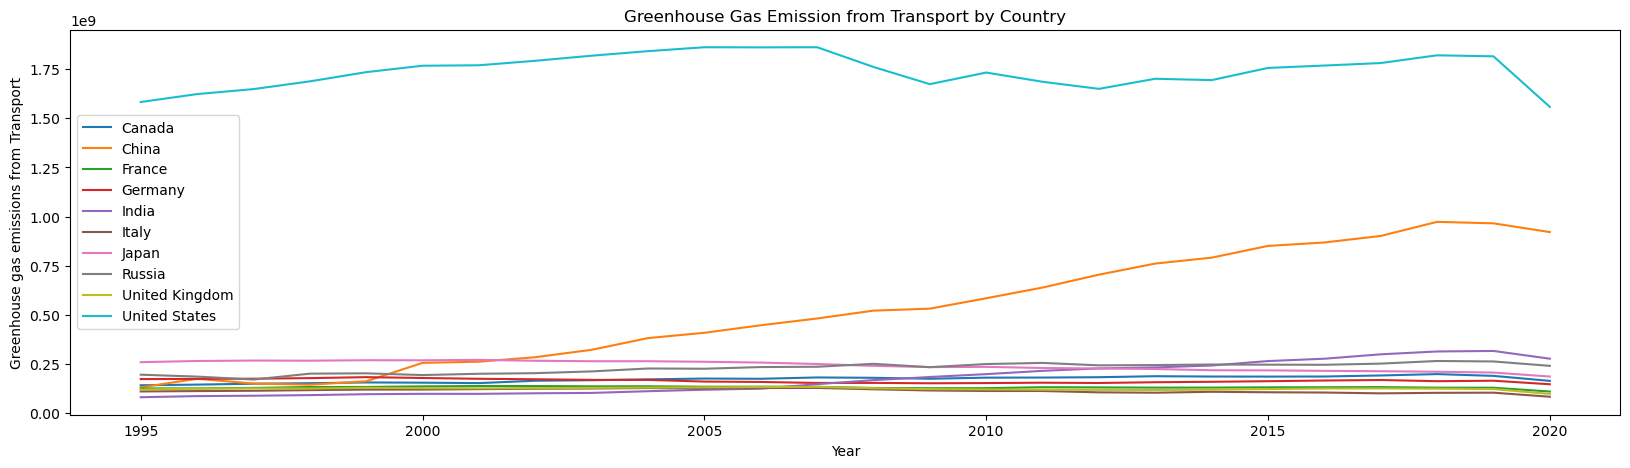

In [43]:
# Plot greenhouse gas emissions for different years and countries
plt.figure(figsize=(20, 5))
for country in final_df['Country'].unique():
    country_info = final_df[final_df['Country'] == country]
    plt.plot(country_info['Year'], country_info['Greenhouse gas emissions from transport'], label=country)

plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions from Transport')
plt.title('Greenhouse Gas Emission from Transport by Country')
plt.legend()

plt.savefig('charts/co2_transport.jpg', format='jpg', dpi=300)


plt.show()

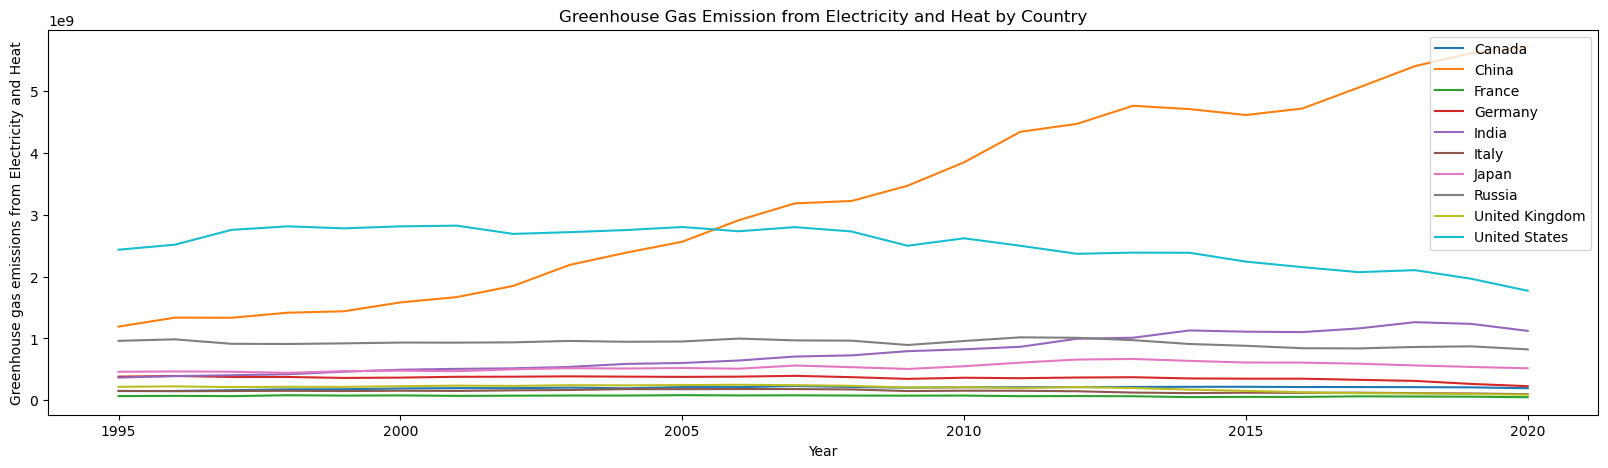

In [44]:
# Plot greenhouse gas emissions for different years and countries
plt.figure(figsize=(20, 5))
for country in final_df['Country'].unique():
    country_info = final_df[final_df['Country'] == country]
    plt.plot(country_info['Year'], country_info['Greenhouse gas emissions from electricity and heat'], label=country)

plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions from Electricity and Heat')
plt.title('Greenhouse Gas Emission from Electricity and Heat by Country')
plt.legend()

plt.savefig('charts/co2_electricityheat.jpg', format='jpg', dpi=300)


plt.show()

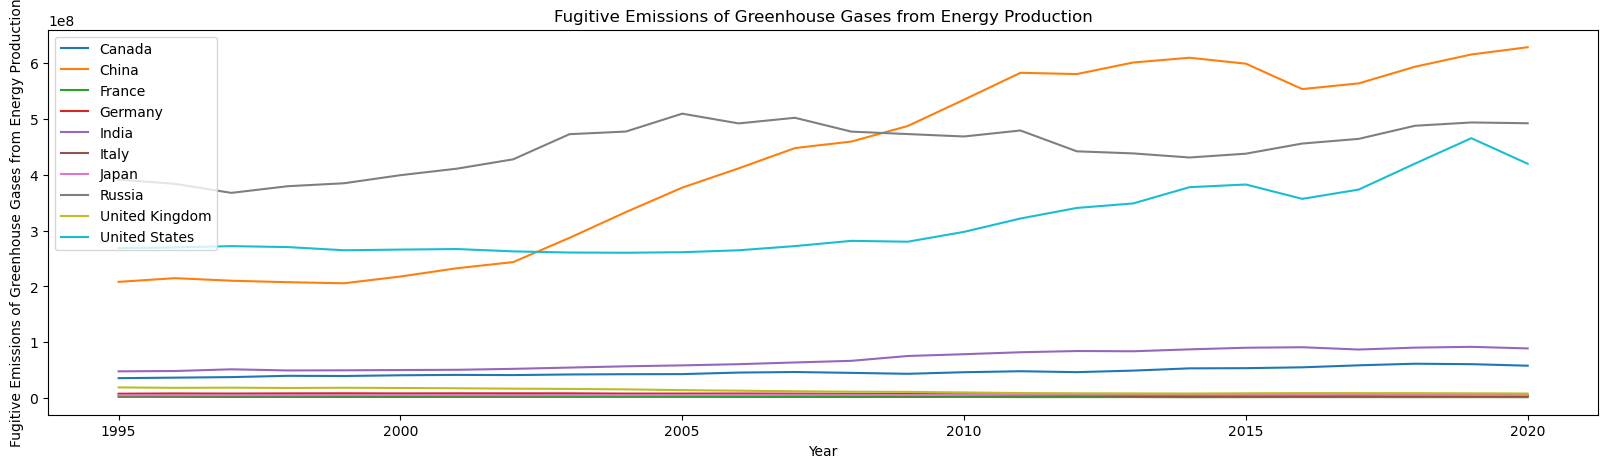

In [45]:
# Plot greenhouse gas emissions for different years and countries
plt.figure(figsize=(20, 5))
for country in final_df['Country'].unique():
    country_info = final_df[final_df['Country'] == country]
    plt.plot(country_info['Year'], country_info['Fugitive emissions of greenhouse gases from energy production'], label=country)

plt.xlabel('Year')
plt.ylabel('Fugitive Emissions of Greenhouse Gases from Energy Production')
plt.title('Fugitive Emissions of Greenhouse Gases from Energy Production')
plt.legend()

plt.savefig('charts/co2_energyproduction.jpg', format='jpg', dpi=300)


plt.show()

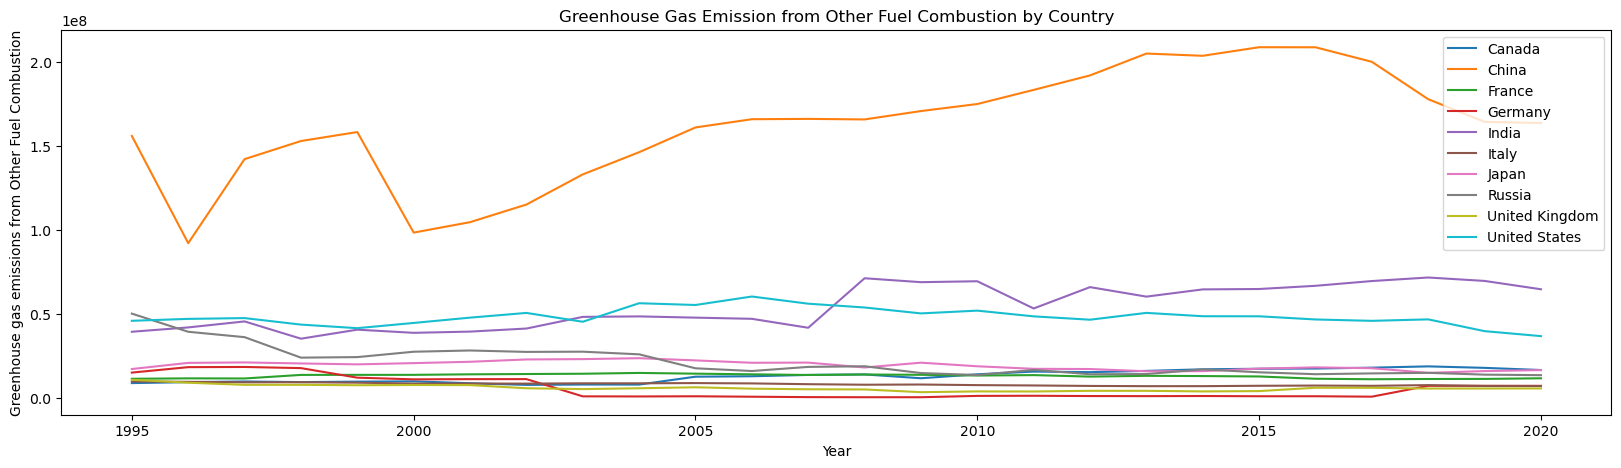

In [46]:
# Plot greenhouse gas emissions for different years and countries
plt.figure(figsize=(20, 5))
for country in final_df['Country'].unique():
    country_info = final_df[final_df['Country'] == country]
    plt.plot(country_info['Year'], country_info['Greenhouse gas emissions from other fuel combustion'], label=country)

plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions from Other Fuel Combustion')
plt.title('Greenhouse Gas Emission from Other Fuel Combustion by Country')
plt.legend()

plt.savefig('charts/co2_combustion.jpg', format='jpg', dpi=300)


plt.show()

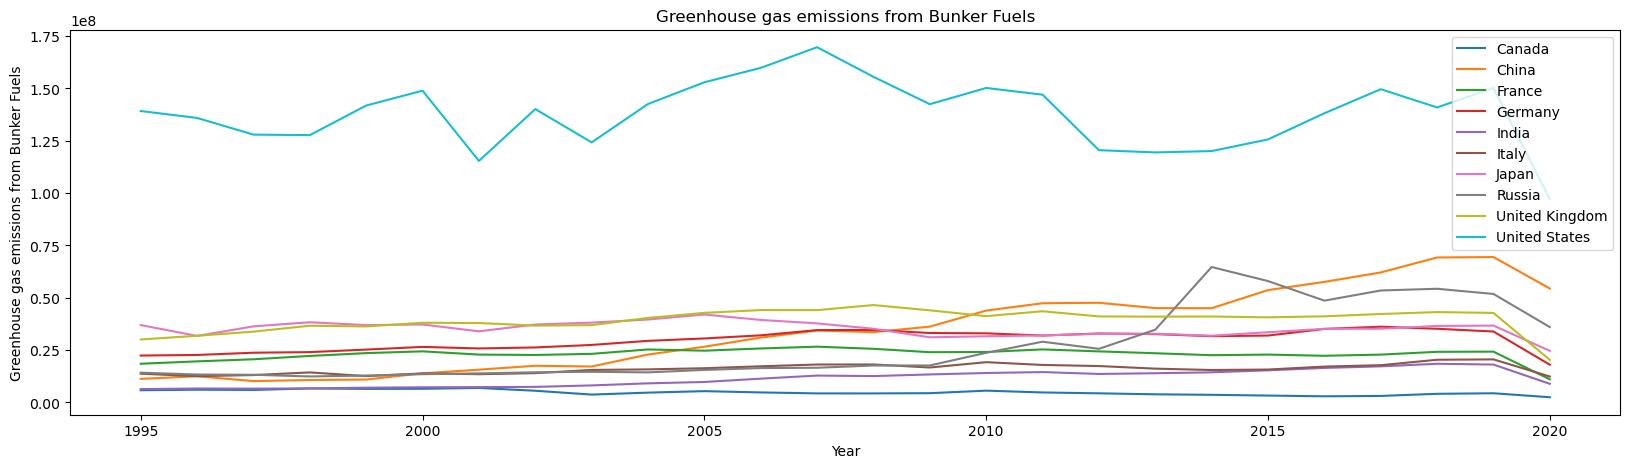

In [47]:
# Plot greenhouse gas emissions for different years and countries
plt.figure(figsize=(20, 5))
for country in final_df['Country'].unique():
    country_info = final_df[final_df['Country'] == country]
    plt.plot(country_info['Year'], country_info['Greenhouse gas emissions from bunker fuels'], label=country)

plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions from Bunker Fuels')
plt.title('Greenhouse gas emissions from Bunker Fuels')
plt.legend()

plt.savefig('charts/co2_bunkerfuels.jpg', format='jpg', dpi=300)

plt.show()

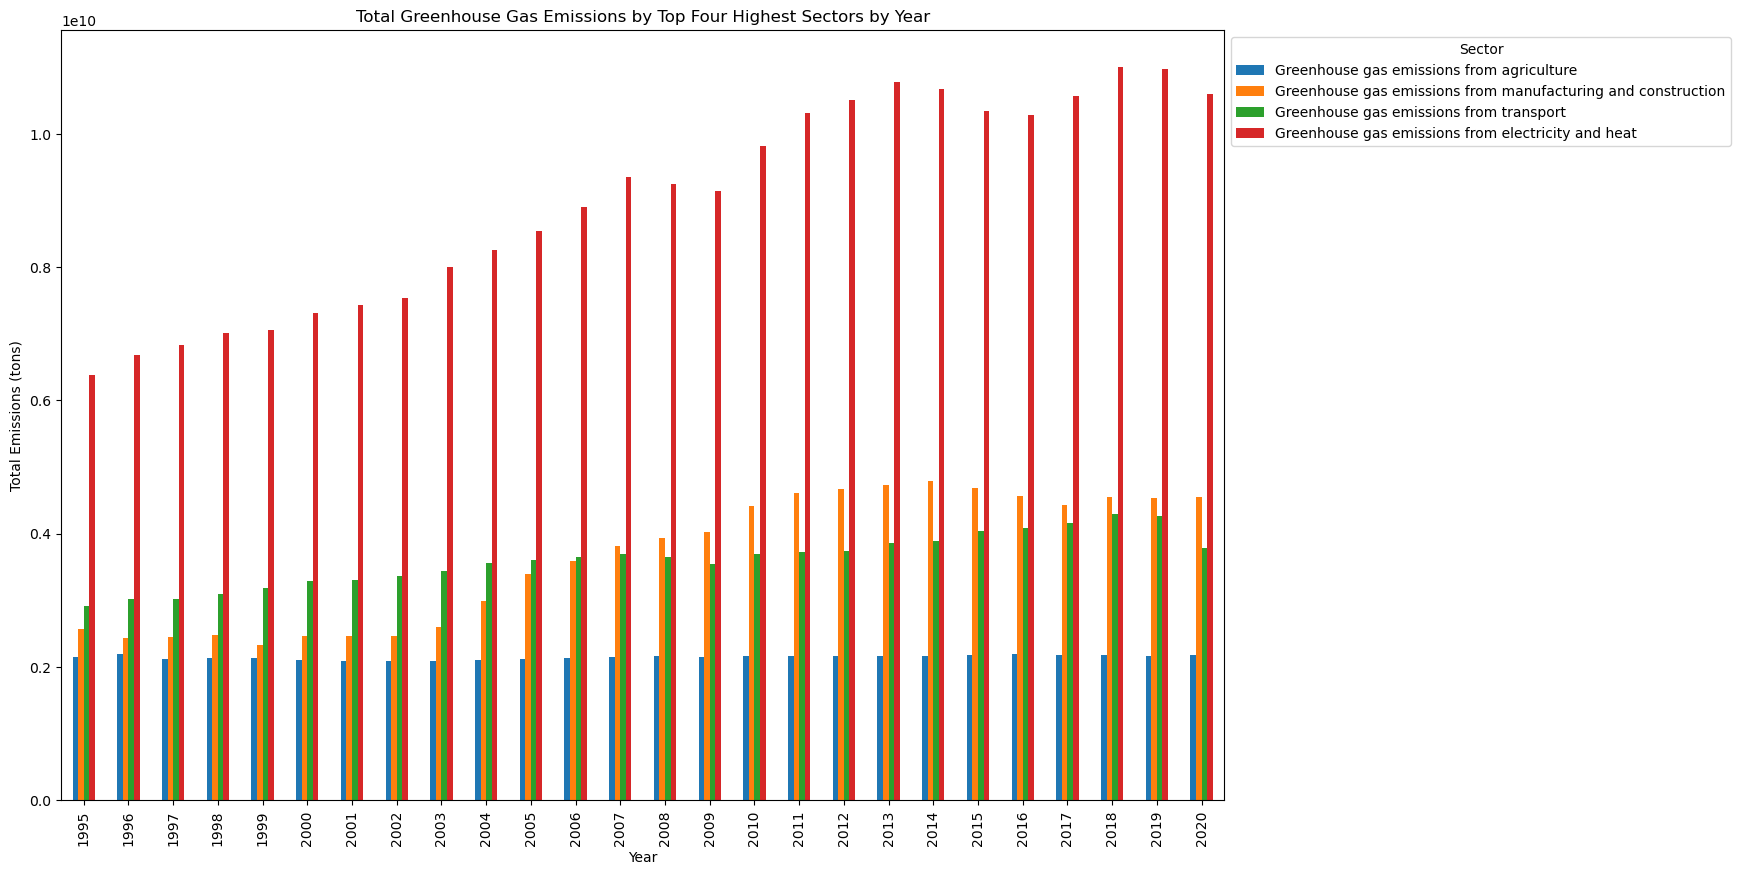

In [48]:
# Group the data by the 'Year' column and calculate the sum of 'Value1' and 'Value2' columns for each year
sum_by_year = final_df.groupby('Year')[['Greenhouse gas emissions from agriculture',
          'Greenhouse gas emissions from manufacturing and construction', 'Greenhouse gas emissions from transport',
          'Greenhouse gas emissions from electricity and heat']].sum()

# Plot the grouped data as a bar graph
sum_by_year.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Year')
plt.ylabel('Total Emissions (tons)')
plt.title('Total Greenhouse Gas Emissions by Top Four Highest Sectors by Year')
plt.legend(title='Sector', bbox_to_anchor=(1, 1))

plt.savefig('charts/co2_compared.jpg', format='jpg', dpi=300)

plt.show()

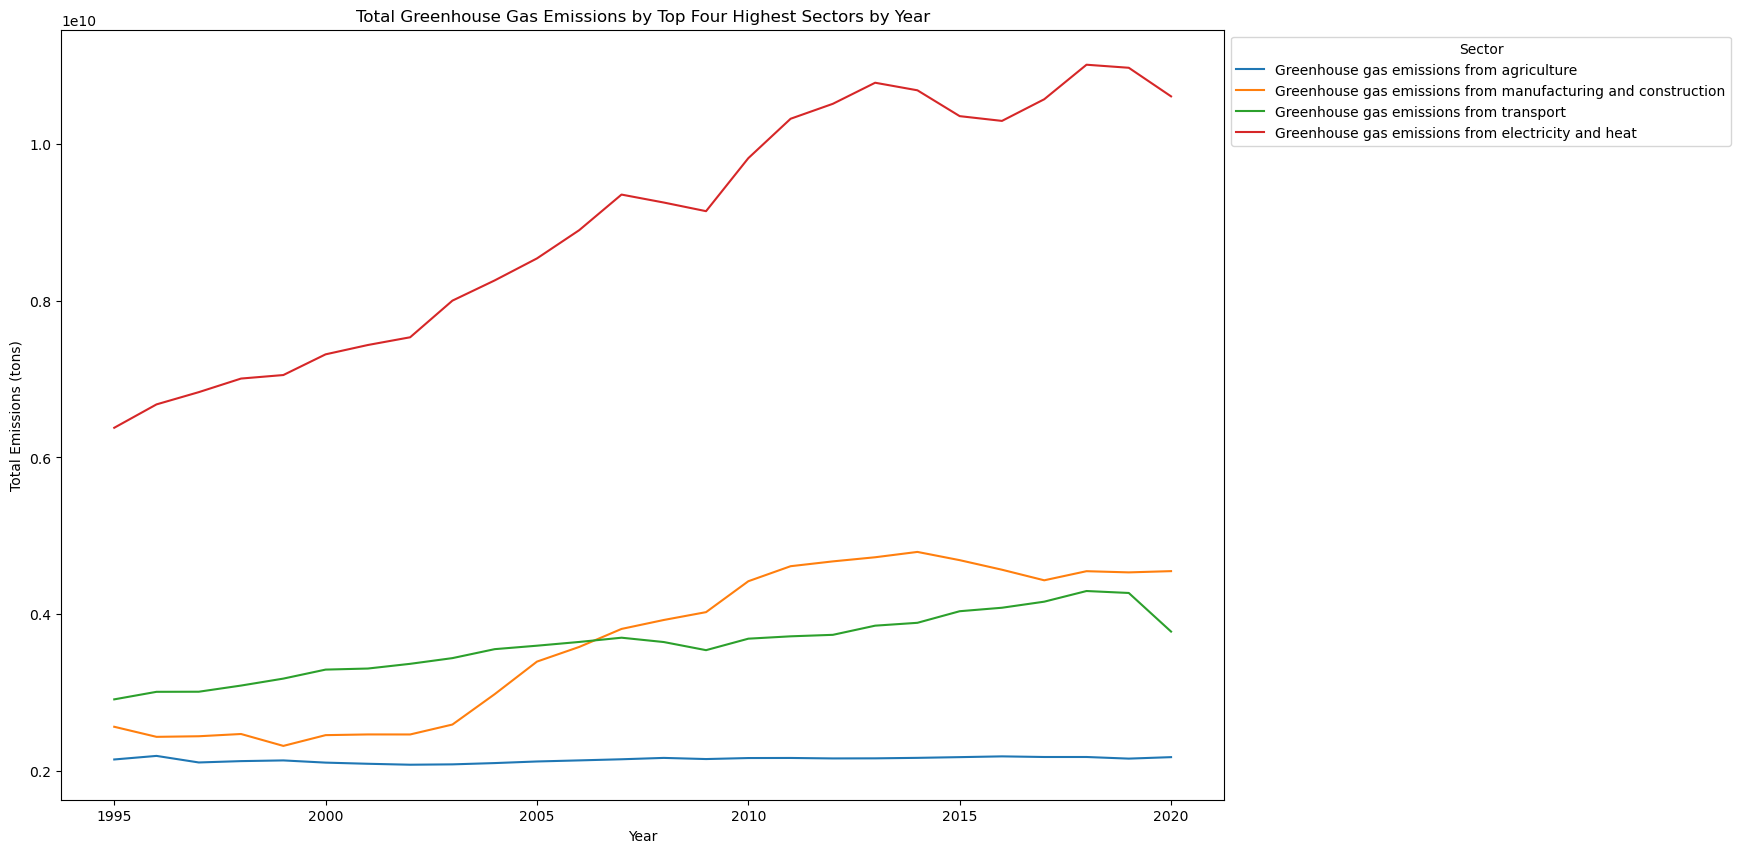

In [49]:
# Group the data by the 'Year' column and calculate the sum of 'Value1' and 'Value2' columns for each year
sum_by_year = final_df.groupby('Year')[['Greenhouse gas emissions from agriculture',
          'Greenhouse gas emissions from manufacturing and construction', 'Greenhouse gas emissions from transport',
          'Greenhouse gas emissions from electricity and heat']].sum()

# Plot the grouped data as a bar graph
sum_by_year.plot(kind='line', figsize=(15, 10))
plt.xlabel('Year')
plt.ylabel('Total Emissions (tons)')
plt.title('Total Greenhouse Gas Emissions by Top Four Highest Sectors by Year')
plt.legend(title='Sector', bbox_to_anchor=(1, 1))

plt.savefig('charts/co2_comparedline.jpg', format='jpg', dpi=300)

plt.show()

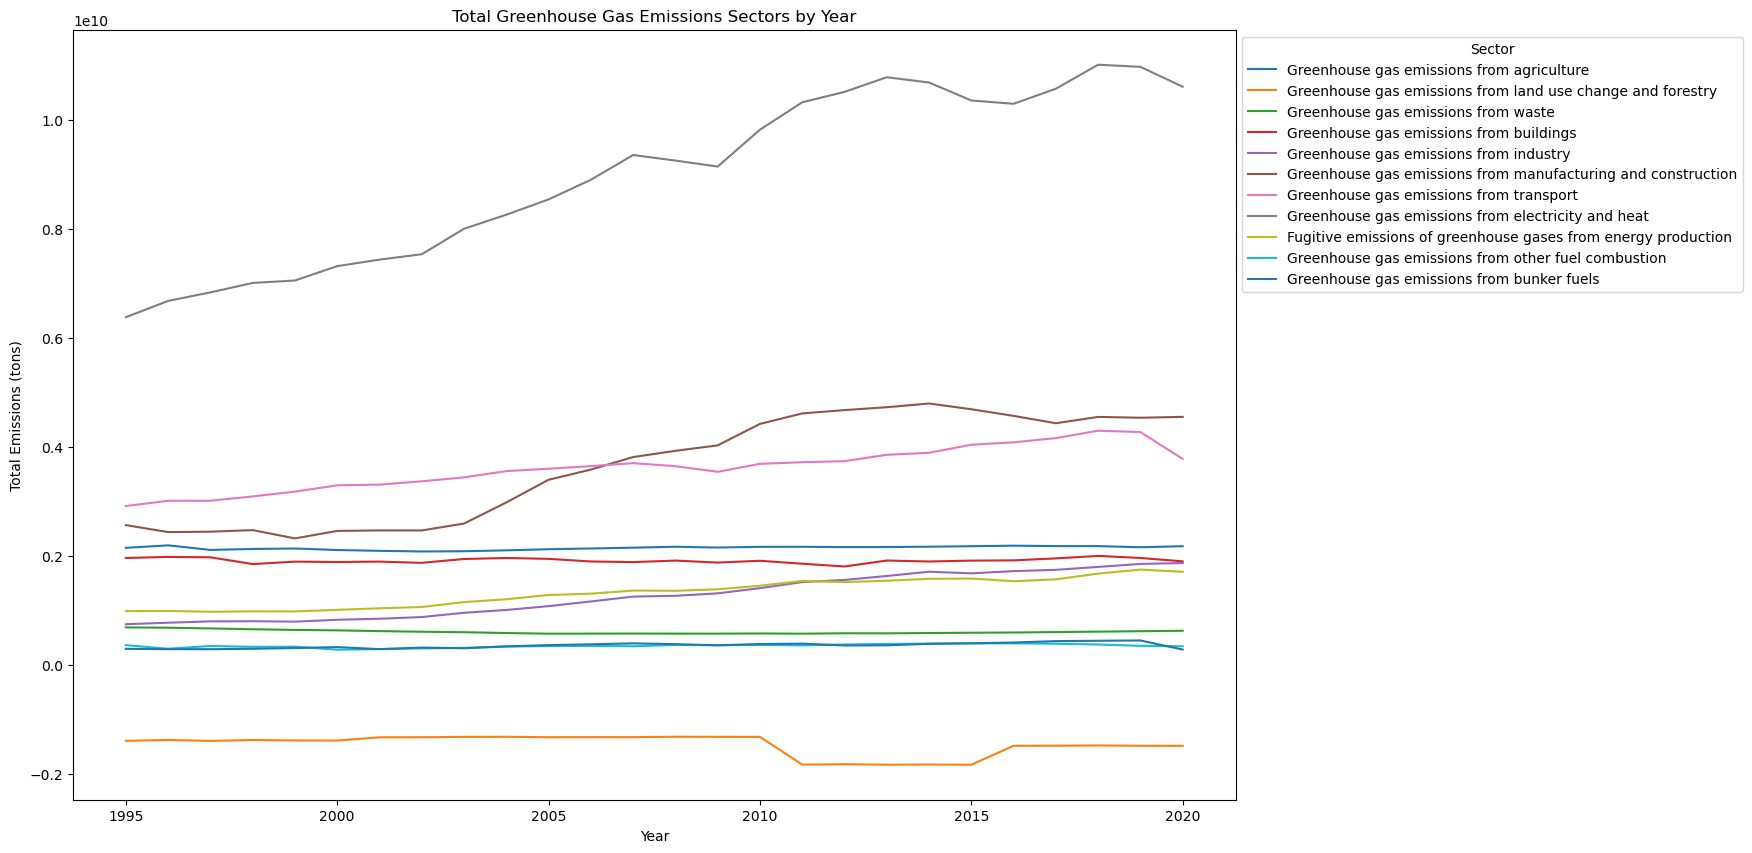

In [50]:
# Group the data by the 'Year' column and calculate the sum of 'Value1' and 'Value2' columns for each year
sum_by_year = final_df.groupby('Year')[['Greenhouse gas emissions from agriculture', 'Greenhouse gas emissions from land use change and forestry',
                                'Greenhouse gas emissions from waste', 'Greenhouse gas emissions from buildings', 'Greenhouse gas emissions from industry',
                                'Greenhouse gas emissions from manufacturing and construction', 'Greenhouse gas emissions from transport',
                                'Greenhouse gas emissions from electricity and heat', 'Fugitive emissions of greenhouse gases from energy production',
                                'Greenhouse gas emissions from other fuel combustion', 'Greenhouse gas emissions from bunker fuels']].sum()

# Plot the grouped data as a bar graph
sum_by_year.plot(kind='line', figsize=(15, 10))
plt.xlabel('Year')
plt.ylabel('Total Emissions (tons)')
plt.title('Total Greenhouse Gas Emissions Sectors by Year')
plt.legend(title='Sector', bbox_to_anchor=(1, 1))

plt.savefig('charts/co2_sectorsall.jpg', format='jpg', dpi=300)

plt.show()
